# **Dataset OULAD**

* Nama  : Vita Amalia Herlinda
* Kelas : Analisis Big Data D

Open University Learning Analytics Dataset (OULAD) adalah kumpulan data yang berisi data tentang mata kuliah(courses), mahasiswa(student), dan interaksinya dengan Virtual Learning Environment (VLE).

Kumpulan data ini unik karena berisi data demografi bersama dengan kumpulan data aliran klik interaksi siswa di VLE, ​​sehingga memungkinkan analisis perilaku siswa yang diwakili oleh tindakan mereka. Kumpulan data terdiri dari tabel yang dihubungkan menggunakan pengidentifikasi unik dan disimpan dalam beberapa file CSV.Kumpulan data tersedia secara gratis di bawah lisensi .


In [404]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

Sebelum melakukan analisis data dengan menggunakan python kita perlu mempersiapkan beberapa library/perpustakaan yang dibutuhkan yaitu :
* Pandas : Perpustakaan untuk manipulasi dan analisis data. Ini menyediakan struktur data untuk menyimpan dan memanipulasi kumpulan data besar secara efisien, serta alat untuk membersihkan, mengubah, dan menganalisis data.

* Numpy : Perpustakaan untuk komputasi numerik dengan Python. Ini memberikan dukungan untuk array dan matriks multidimensi yang besar, serta berbagai fungsi matematika.

* sklearn.preprocessing : Sebuah module dalam perpustakaan scikit-learn yang menyediakan alat untuk pra-pemrosesan data. Ini mencakup fungsi untuk penskalaan, normalisasi, dan pengkodean data.

* sklearn.model_selection : Module dalam perpustakaan scikit-learn yang menyediakan alat untuk pemilihan dan evaluasi model. Ini mencakup fungsi untuk membagi data menjadi set pelatihan dan pengujian, serta alat untuk validasi silang.

* seaborn : Perpustakaan untuk visualisasi data dengan Python. Ini menyediakan antarmuka tingkat tinggi untuk membuat grafik statistik yang informatif dan menarik.

library sendiri adalah sebuah kumpulan kode program yang terdiri dari paket atau module untuk memudahkan pengguna dalam membuat suatu program tanpa harus menulis banyak kode.

In [405]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Pada kode program ini di gunakan untuk menyambungkan Google Drive di Google Colab. Agar file yang kita gunakan dapat diakses dan disimpan diakun google drive kita langsung dari notebook.

Setelah itu kita melakukan EDA (Exploratory Data Analysis) pada python. proses in adalah tahapan penting dalam analisis data karena dapat membantu mendeteksi kesalahan, mengidentifikasi outlier dalam kumpulan data, memahami hubungan antar data, menggali faktor-faktor yang mempengaruhi suatu fenomena, dan mempersiapkan data untuk tahap pemodelan.

Pada analisis ini kita melakukan EDA pada 7 data (file csv) yaitu :
* 1.Student Assessment.
* 2.StudentInfo
* 3.StudentRegristration
* 4.vle
* 5.Course
* 6.Assessment
* 7.studentVle


# **EDA**
* Student Assessment


In [406]:
studentAssessment = pd.read_csv('/content/drive/MyDrive/studentAssessment.csv')

studentAssessment.head(5)

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


Kode program diatas digunakan untuk membaca file CSV ke objek Pandas DataFrame dan menampilkan 5 baris pertama pada dataframe.

In [407]:
studentAssessment.shape

(173912, 5)

Kode program diatas memberikan informasi mengenai jumlah baris sebanyak 173912 dan kolom sebanyak 5 ,yang ada pada dataset file.csv student assessment

In [408]:
studentAssessment.nunique()

id_assessment       188
id_student        23369
date_submitted      312
is_banked             2
score               101
dtype: int64

Kode program diatas memberikan informasi mengenai jumlah nilai unik yang ada pada setiap kolom pada dataframe (file.csv)

In [409]:
studentAssessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


informasi yang diberikan pada kode program diatas adalah ringkasan singkat dari dataframe,termasuk indeks dtype dan kolom, nilai bukan nol, dan penggunaan memori.


In [410]:
studentAssessment.isnull().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

Pada kode program diatas memberikan informasi mengenai jumlah nilai yang hilang (NaN) disetiap kolom dataframe.

In [411]:
studentAssessment.describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


fungsi describe pada kode program diatas memberikan informasi mengenai statistik deskriptif objek DataFrame yang dibuat dari file CSV.yang memberikan ringkasan tendensi sentral, dispersi, dan bentuk distribusi DataFrame, dengan menghitung berbagai statistik seperti nilai hitungan, mean, deviasi standar, nilai minimum, dan maksimum. Metode ini berguna untuk memahami dengan cepat distribusi data dalam DataFrame, dan untuk mengidentifikasi potensi masalah seperti outlier atau tipe data yang salah. Outputnya akan menampilkan hitungan, mean, deviasi standar, nilai minimum, dan maksimum, serta kuartil dan statistik ringkasan lainnya untuk setiap kolom numerik di dataframe.

# **EDA**
### StudentInfo


In [412]:
studentInfo = pd.read_csv('/content/drive/MyDrive/studentInfo.csv')

studentInfo.head(5)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


Kode program diatas digunakan untuk membaca file CSV ke objek Pandas DataFrame dan menampilkan 5 baris teratas pada dataframe.

In [413]:
studentInfo.shape

(32593, 12)

Kode program shape berfungsi untuk memberikan informasi jumlah baris dan kolom yang ada pada dataset studentInfo yaitu sebanyak 32593 baris dan 12 kolom.

In [414]:
studentInfo.nunique()

code_module                 7
code_presentation           4
id_student              28785
gender                      2
region                     13
highest_education           5
imd_band                   10
age_band                    3
num_of_prev_attempts        7
studied_credits            61
disability                  2
final_result                4
dtype: int64

Kode program diatas nunique berfungsi untuk memberikan informasi mengenai jumlah nilai unik yang ada pada setiap kolom pada dataframe.

In [415]:
studentInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


Kode program diatas memberikan informasi ringkasan singkat dari dataframe, yaitu indeks dtype dan kolom, nilai bukan nol, dan penggunaan memori.

In [416]:
studentInfo.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


In [417]:
studentInfo.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

Pada kode program diatas memberikan informasi mengenai jumlah nilai yang hilang (NaN) disetiap kolom dataframe.

# **EDA**
* StudentRegristration

In [418]:
StudentRegristration= pd.read_csv('/content/drive/MyDrive/studentRegistration.csv')

StudentRegristration.head(5)

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


read_csv digunakan untuk membaca dataframe studentRegristration dan menampilkan 5 baris teratas pada dataset.

In [419]:
StudentRegristration.shape

(32593, 5)

Kode program diatas memberikan informasi untuk melihat jumlah baris dan kolom pada studentregristration, yang berjumlah sebanyak 32593 baris dan 5 kolom.

In [420]:
StudentRegristration.dtypes

code_module             object
code_presentation       object
id_student               int64
date_registration      float64
date_unregistration    float64
dtype: object

Kode program diatas memberikan sebuah informasi mengenai type data tiap kolom pada dataframe.

In [421]:
StudentRegristration.nunique()

code_module                7
code_presentation          4
id_student             28785
date_registration        332
date_unregistration      416
dtype: int64

Kode diatas menunjukan jumlah nilai unik yang ada pada setiap kolom didaataframe.

In [422]:
StudentRegristration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


Kode diatas memberikan informasi mengenai ringkasan dataframe mulai dari type data,nama kolom dan memory yang digunakan.

In [423]:
StudentRegristration.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

Kode diatas mengecek apakah terdapat missing value atau jumlah nilai yang hilang (NaN) pada setiap kolom baris dataframe.

# **EDA**
### vle


In [424]:
vle= pd.read_csv('/content/drive/MyDrive/vle.csv')

vle.head(5)

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


Kode program diatas digunakan untuk membaca file CSV ke objek Pandas DataFrame dan menampilkan 5 baris teratas pada dataframe.

In [425]:
vle.shape

(6364, 6)

Kode diatas melihat jumlah baris dan kolom pada dataframe yaitu 6364 baris dan 6 kolom.

In [426]:
vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


Kode diatas melihat informasi ringkasan dari dataframe  seperti nama kolom, dan type data dan penggunaan memori.

In [427]:
vle.dtypes

id_site                int64
code_module           object
code_presentation     object
activity_type         object
week_from            float64
week_to              float64
dtype: object

Kode diatas melihat tipe data disetiap kolom dataframe.

In [428]:
vle.nunique()

id_site              6364
code_module             7
code_presentation       4
activity_type          20
week_from              30
week_to                30
dtype: int64

Kode program diatas memberikan informasi mengenai jumlah nilai unik yang ada pada setiap kolom pada datafram.

In [429]:
vle.isnull().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

Pada kode program diatas memberikan informasi mengenai jumlah nilai yang hilang (NaN) disetiap kolom dataframe.

# EDA
* Course

In [430]:
course= pd.read_csv('/content/drive/MyDrive/courses.csv')

Membaca dataframe dengan read.csv

In [431]:
course.head(5)

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


Kode program diatas menampilkan 5 data teratas pada dataframe.

In [432]:
course.shape

(22, 3)

kode program diatas memberikan informasi mengenai jumlah baris dan kolom pada dataset. yaitu berjumlah 22 baris dan 3 kolom.

In [433]:
course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


Kode program diatas memberikan informasi ringkasan singkat dari dataframe,termasuk indeks dtype dan kolom, nilai bukan nol, dan penggunaan memori.

In [434]:
course.dtypes

code_module                   object
code_presentation             object
module_presentation_length     int64
dtype: object

kode diatas memberikan informasi megenai type data yang digunakan pada dataframe.


In [435]:
course.nunique()

code_module                   7
code_presentation             4
module_presentation_length    7
dtype: int64

Kode program diatas memberikan informasi mengenai jumlah nilai unik yang ada pada setiap kolom pada dataframe.

In [436]:
course.isnull().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

Pada kode program diatas memberikan informasi mengenai jumlah nilai yang hilang (NaN) disetiap kolom dataframe.

# EDA
* Assessment

In [437]:
assessment=pd.read_csv('/content/drive/MyDrive/assessments.csv')

In [438]:
assessment.head(5)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


membaca dataframe menggunakan read.csv  dan menampilkan 5 data teratas dataframe.

In [439]:
assessment.shape

(206, 6)

Kode program diatas memberikan informasi mengenai jumlah baris sebanyak 206 dan kolom sebanyak 6 pada dataframe.

In [440]:
assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


Melihat ringkasan dataframe  yaitu jumlah kolom, type data dll

In [441]:
assessment.dtypes

code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object

Kode diatas digunakan untuk melihat type data tiap kolom pada dataframe.

In [442]:
assessment.nunique()

code_module            7
code_presentation      4
id_assessment        206
assessment_type        3
date                  74
weight                24
dtype: int64

Kode program diatas memberikan informasi mengenai jumlah nilai unik yang ada pada setiap kolom pada dataframe

In [443]:
assessment.isnull().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

Pada kode program diatas memberikan informasi mengenai jumlah nilai yang hilang (NaN) disetiap kolom dataframe.

# EDA
* studentVle

In [444]:
studentvle= pd.read_csv('/content/drive/MyDrive/studentVle.csv')

In [445]:
studentvle.head(5)

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400.0,546652.0,-10.0,4.0
1,AAA,2013J,28400.0,546652.0,-10.0,1.0
2,AAA,2013J,28400.0,546652.0,-10.0,1.0
3,AAA,2013J,28400.0,546614.0,-10.0,11.0
4,AAA,2013J,28400.0,546714.0,-10.0,1.0


Membaca file csv dengan fungsi read.csv  dan menampilkan 5 baris teratas dari dataframe.

In [446]:
studentvle.shape

(8769470, 6)

Kode program diatas memberikan informasi mengenai jumlah baris sebanyak 8769470 dan kolom sebanyak 6.

In [447]:
studentvle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8769470 entries, 0 to 8769469
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   code_module        object 
 1   code_presentation  object 
 2   id_student         float64
 3   id_site            float64
 4   date               float64
 5   sum_click          float64
dtypes: float64(4), object(2)
memory usage: 401.4+ MB


Kode program diatas memberikan informasi ringkasan singkat dari dataframe,termasuk indeks dtype dan kolom, nilai bukan nol, dan penggunaan memori.

In [448]:
studentvle.dtypes

code_module           object
code_presentation     object
id_student           float64
id_site              float64
date                 float64
sum_click            float64
dtype: object

Kode program tersebut digunakan untuk melihat type data dari setiap kolom dataframe.

In [449]:
studentvle.nunique()

code_module              6
code_presentation        4
id_student           21953
id_site               5276
date                   295
sum_click              466
dtype: int64

Kode program diatas memberikan informasi mengenai jumlah nilai unik yang ada pada setiap kolom pada dataframe (file.csv)

In [450]:
studentvle.isnull().sum()

code_module          0
code_presentation    1
id_student           1
id_site              1
date                 1
sum_click            1
dtype: int64

Pada kode program diatas memberikan informasi mengenai jumlah nilai yang hilang (NaN) disetiap kolom dataframe.

# **Integrasi Data (Merge)**

In [451]:
integrasi_df = pd.merge(studentAssessment, studentInfo, on='id_student')
integrasi_df.head(10)

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,1752,11391,18,0,78.0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,1753,11391,53,0,85.0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
2,1754,11391,115,0,80.0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
3,1755,11391,164,0,85.0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
4,1756,11391,212,0,82.0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
5,1752,28400,22,0,70.0,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
6,1753,28400,52,0,68.0,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
7,1754,28400,121,0,70.0,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
8,1755,28400,164,0,64.0,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
9,1756,28400,212,0,60.0,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass


Integrasi data atau merge pada Python adalah proses penggabungan dua atau lebih DataFrame menjadi satu DataFrame yang lebih besar dengan cara menggabungkan baris atau kolom yang sama.

Disini saya melakukan integrasi pada 2 data yaitu studentAssessment dan StudentInfo dengan menggunakan key  id_student untuk join atau menggabungkan data tersebut kemudian disimpan dalam variabel baru menjadi 1 file dataframe.

# **Preprocessing data**

In [452]:
integrasi_df=integrasi_df.drop_duplicates()

Kode diatas melakukan proses data cleaning yaitu penghapusan nilai duplikasi atau nilai berulang karena nilai duplikat dapat menyebabkan masalah seperti pengukuran statistik yang tidak tepat dan menghasilkan kesimpulan yang salah.Dengan penghapusan nilai duplikat dapat memastikan bahwa data akan menghasilkan keakuratan yang baik.

In [453]:
integrasi_df.isnull().sum()

id_assessment              0
id_student                 0
date_submitted             0
is_banked                  0
score                    227
code_module                0
code_presentation          0
gender                     0
region                     0
highest_education          0
imd_band                9315
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

Kode program diatas ini digunakan untuk menghitung jumlah nilai yang hilang di setiap kolom Pandas DataFrame yang sudah di integrasikan.

In [454]:
integrasi_df.dropna(subset=['score', 'imd_band'], inplace=True)


In [455]:

integrasi_df.isnull().sum()

id_assessment           0
id_student              0
date_submitted          0
is_banked               0
score                   0
code_module             0
code_presentation       0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64

Kode program di atas melakukan cleaning missing value menggunakan dropna() yaitu pada Kolom score dan imd_band yang berisi informasi nilai yang diperoleh  dari penilaian dan indeks kemiskinan mahasiswa. Alasan mengapa kita harus melakukan dropna() pada kolom tersebut adalah karena terdapat nilai kosong (missing values) . Hal ini dapat mengganggu analisis data dan menghasilkan kesimpulan yang salah. Dengan melakukan dropna(), baris yang mengandung nilai kosong pada kolom  akan dihapus dari dataset sehingga analisis data dapat dilakukan dengan lebih akurat. alasan lain kenapa harus dilakukan dropna adalah karena kita tidak akan menggunakan kolom tersebut.

In [456]:
for kolom in integrasi_df.columns:
  if integrasi_df[kolom].dtype == 'object':
    le = LabelEncoder()
    integrasi_df[kolom]= le.fit_transform(integrasi_df[kolom])

integrasi_df.head(5)

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,1752,11391,18,0,78.0,0,1,1,0,1,9,2,0,240,0,2
1,1753,11391,53,0,85.0,0,1,1,0,1,9,2,0,240,0,2
2,1754,11391,115,0,80.0,0,1,1,0,1,9,2,0,240,0,2
3,1755,11391,164,0,85.0,0,1,1,0,1,9,2,0,240,0,2
4,1756,11391,212,0,82.0,0,1,1,0,1,9,2,0,240,0,2


LabelEncoder digunakan untuk mengubah nilai kategorikal pada kolom tertentu menjadi nilai numerik. Hal ini dilakukan agar model machine learning dapat memproses data tersebut dengan lebih baik. Contohnya, pada kolom gender, nilai kategorikal "Male" dan "Female" dapat diubah menjadi nilai numerik 0 dan 1.

Disini saya ingin melihat korelasi antara highest education dengan final result oleh karena itu saya ingin melihat visualisasi dari kedua kolom tersebut.

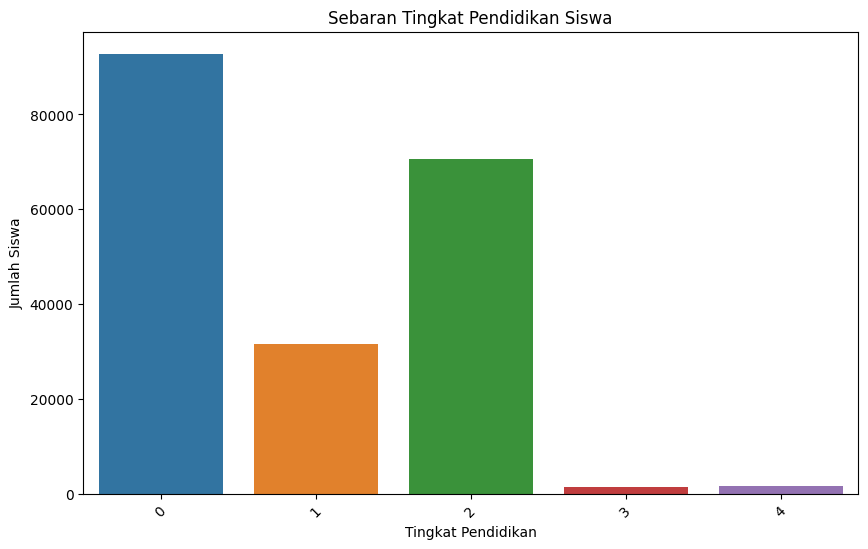

In [457]:
plt.figure(figsize=(10, 6))
sns.countplot(data=integrasi_df, x='highest_education')
plt.title('Sebaran Tingkat Pendidikan Siswa')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah Siswa')
plt.xticks(rotation=45)
plt.show()


kode diatas memvisualisasikan kolom highest education  menggunakan diagram batang atau count plot, karena dengan menggunakan visualisasi tersebut kita dapat dengan mudah membandingkan tingkat pendidikan yang berbeda satu sama lain. dan dapat melihat dengan cepat berapa banyak siswa dalam setiap tingkat pendidikan.

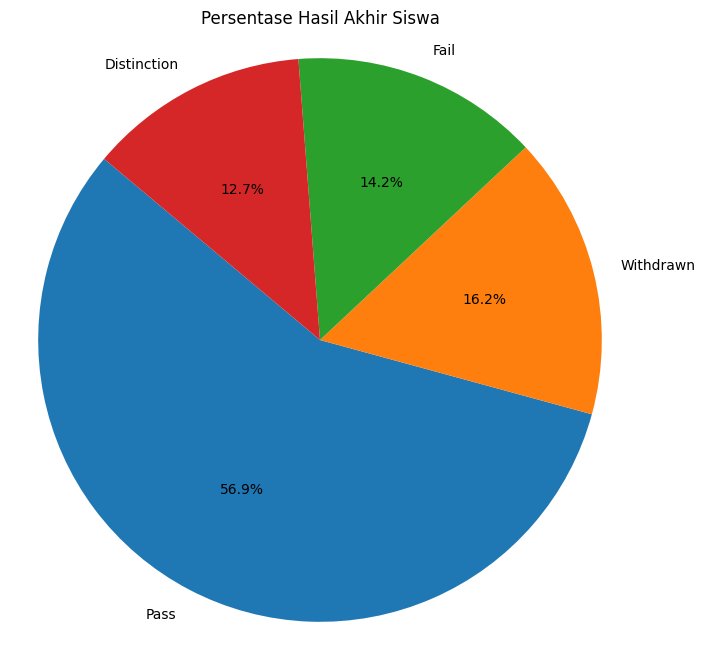

In [458]:
import matplotlib.pyplot as plt

result_counts = integrasi_df['final_result'].value_counts()

labels = ['Pass', 'Withdrawn', 'Fail', 'Distinction']

plt.figure(figsize=(8, 8))
plt.pie(result_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Hasil Akhir Siswa')
plt.axis('equal')
plt.show()


Visualisasi diatas berasal dari kolom final result. pemilihan pie chart digunakan karena ini akan memrepresentasikan persen student yang melalui final result.

In [459]:
X = integrasi_df[['highest_education']]
Y = integrasi_df['final_result']

kode diatas adalah menentukan kolom yang akan dikorelasikan yaitu satu untuk variabel independen (highest_education) dan satu untuk variabel dependen (final_result). pemisahan variabel ini dilakukan agar memahami bagaimana variabel independen (X) memengaruhi variabel dependen (Y). Dengan memisahkan X dan Y, kita dapat memodelkan hubungan antara keduanya, yaitu bagaimana variasi dalam X berkorelasi dengan variasi dalam Y.

In [460]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Standarscaler dilakukan untuk memastikan  bahwa semua variabel numerik dalam dataset memiliki rata-rata (mean) sekitar 0 dan deviasi standar (standard deviation) sekitar 1. dan untuk mengatasi masalah skala yang berbeda agar diubah menjadi skala yang serupa atau saling mendekati.

In [461]:
correlation_matrix_xy = integrasi_df[['highest_education', 'final_result']].corr(numeric_only=True)


Kode diatas adalah perintah untuk menghitung matriks korelasi (hubungan) anatara variabel dalam dataframe.

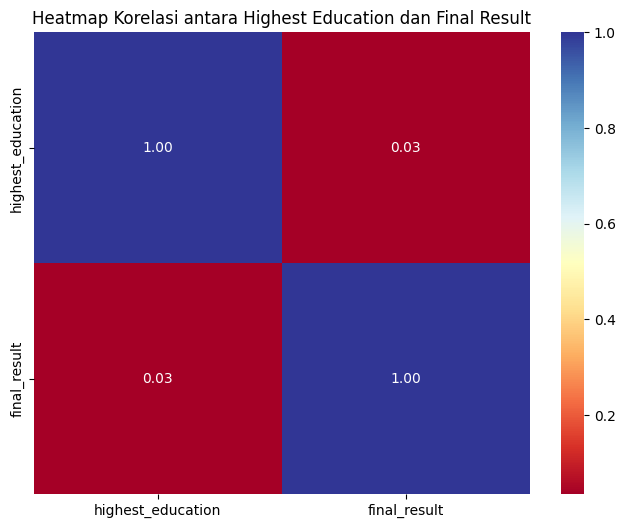

In [462]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_xy, annot=True, cmap='RdYlBu', fmt=".2f")
plt.title('Heatmap Korelasi antara Highest Education dan Final Result')
plt.show()


Kode diatas adalah melakukan visualisasi data antara 2 variabel independen highest Education (X) dan variabel dependen final result (y) untuk melihat korelasi dari keduanya. pemilihan visualisasi heatmap adalah alat yang efektif untuk memvisualisasikan korelasi antara variabel-variabel dalam bentuk matriks untuk mengidentifikasi hubungan. Ini memungkinkan kita dengan cepat melihat pola hubungan antara variabel-variabel tersebut apakah korelasi positif atau negatif.

Analisis korelasi dilakukan untuk Tujuan : mengidentifikasi sejauh mana hubungan tingkat pendidikan tertinggi (highest education) berpengaruh terhadap hasil pembelajaran (final result).
